# AS - Campagne expérimentale

2018 - 2019


Binome : Juliette ORTHOLAND, Stieban FERNANDEZ

----

In [1]:
%load_ext autoreload
%autoreload 2

import torch
from test import *
from highway import HighwayModel

# CUDA pytorch
dtype = torch.FloatTensor
if torch.cuda.is_available():
    CUDA = True
    dtype = torch.cuda.FloatTensor
    # preciser chaque tensor et activer cuda pour chaque modele
    # A revoir
    
from torch.nn import Linear
from torch.nn import Sequential

from torch.nn import MSELoss
from torch.nn import CrossEntropyLoss

## Jeu de données : MNIST

In [22]:
path = "data"
batch_size = 60000
batch_test = 10000

train_loader, test_loader = get_dataset(batch_size, batch_test, path)

In [23]:
for i, (data, target) in enumerate(train_loader):
    print(data.shape, target.shape)
    break

torch.Size([60000, 1, 28, 28]) torch.Size([60000])


In [4]:
dim = 28*28

## Tests préliminaires

### Perceptron

100%|██████████| 20/20 [01:33<00:00,  4.65s/it]


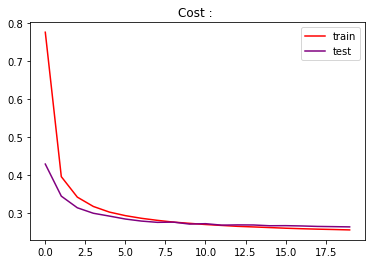

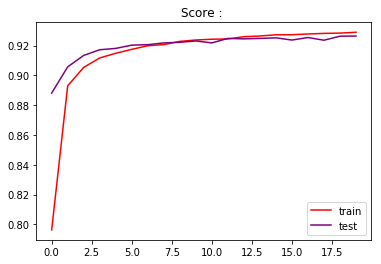

In [10]:
model = Linear( dim, 10 )
loss = CrossEntropyLoss()
lr = 3e-4
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=20)
plot_CS(*tmp)

In [11]:
for t in tmp:
    print(t[-5:])

[tensor(0.2606), tensor(0.2592), tensor(0.2581), tensor(0.2572), tensor(0.2561)]
[tensor(0.9273), tensor(0.9278), tensor(0.9282), tensor(0.9284), tensor(0.9289)]
[tensor(0.2673), tensor(0.2665), tensor(0.2653), tensor(0.2647), tensor(0.2640)]
[tensor(0.9237), tensor(0.9254), tensor(0.9236), tensor(0.9263), tensor(0.9264)]


### Régression logistique

100%|██████████| 50/50 [03:56<00:00,  4.67s/it]


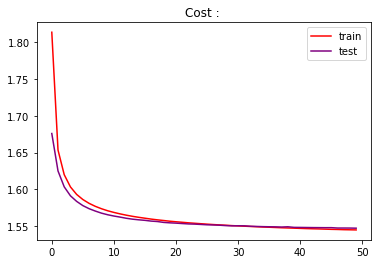

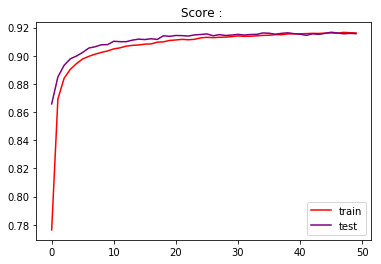

In [16]:
model = Sequential(
    Linear( dim, 10 ),
    torch.nn.Sigmoid()
)
loss = CrossEntropyLoss()
lr = 3e-4
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=50)
plot_CS(*tmp)

In [17]:
for t in tmp:
    print(t[-5:])

[tensor(1.5456), tensor(1.5455), tensor(1.5452), tensor(1.5450), tensor(1.5449)]
[tensor(0.9162), tensor(0.9160), tensor(0.9166), tensor(0.9164), tensor(0.9162)]
[tensor(1.5479), tensor(1.5474), tensor(1.5474), tensor(1.5474), tensor(1.5472)]
[tensor(0.9167), tensor(0.9162), tensor(0.9156), tensor(0.9159), tensor(0.9157)]


### First NN - Tanh + Sigmoid

100%|██████████| 50/50 [03:53<00:00,  4.60s/it]


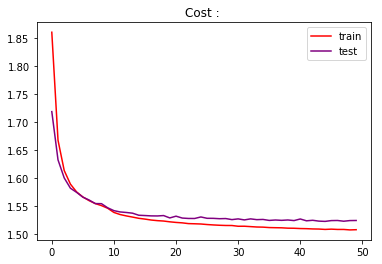

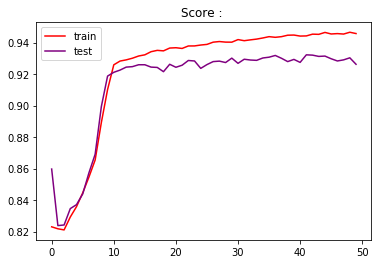

In [19]:
model = Sequential(
    Linear( dim, 15 ),
    torch.nn.Tanh(),
    Linear( 15, 10 ),
    torch.nn.Sigmoid()
)
loss = CrossEntropyLoss()
lr = 2e-3
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=50)
plot_CS(*tmp)

### NN - 1 hidden layer

100%|██████████| 50/50 [03:37<00:00,  4.36s/it]


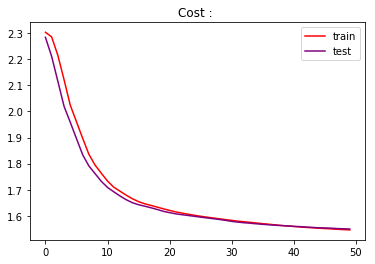

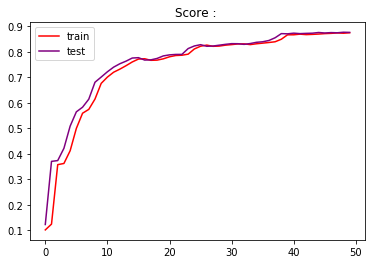

In [25]:
model = Sequential(
    Linear( dim, 30 ),
    torch.nn.Tanh(),
    Linear( 30, 20),
    torch.nn.ReLU(),
    Linear( 20, 10 ),
    torch.nn.Sigmoid()
)
loss = CrossEntropyLoss()
lr = 1e-1
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=50)
plot_CS(*tmp)

In [26]:
for t in tmp:
    print(t[-5:])

[tensor(1.5510), tensor(1.5496), tensor(1.5481), tensor(1.5469), tensor(1.5458)]
[tensor(0.8709), tensor(0.8719), tensor(0.8735), tensor(0.8724), tensor(0.8742)]
[tensor(1.5533), tensor(1.5524), tensor(1.5509), tensor(1.5501), tensor(1.5494)]
[tensor(0.8734), tensor(0.8749), tensor(0.8742), tensor(0.8763), tensor(0.8757)]


100%|██████████| 50/50 [03:36<00:00,  4.27s/it]


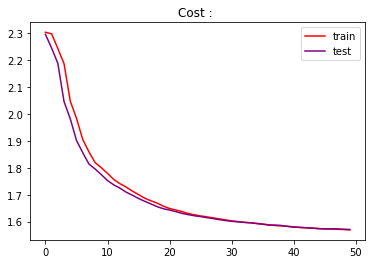

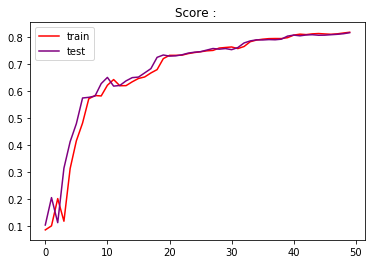

In [27]:
model = Sequential(
    Linear( dim, 30 ),
    torch.nn.Tanh(),
    Linear( 30, 20),
    torch.nn.ReLU(),
    Linear( 20, 10 ),
    torch.nn.Sigmoid()
)
loss = CrossEntropyLoss()
lr = 1e-1
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=50)
plot_CS(*tmp)

### NN - 2 hidden layers

100%|██████████| 100/100 [07:38<00:00,  4.53s/it]


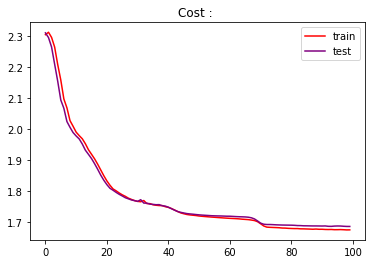

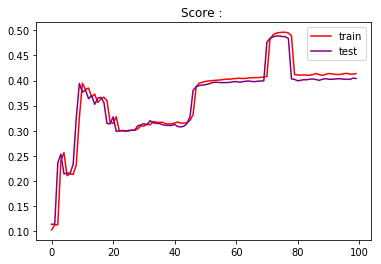

In [29]:
model = Sequential(
    Linear( dim, 50 ),
    torch.nn.Sigmoid(),
    Linear( 50, 30),
    torch.nn.ReLU(),
    Linear( 30, 20),
    torch.nn.Sigmoid(),
    Linear( 20, 10 ),
    torch.nn.Sigmoid()
)
loss = CrossEntropyLoss()
lr = 1e-1
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=100)
plot_CS(*tmp)

### Highway



  0%|          | 0/10 [00:00<?, ?it/s]/users/nfs/Etu6/3407186/M2/AS/AS-TME1/Campagne Exp/highway.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T = self.gate_func(self.gate(x))


 10%|█         | 1/10 [00:13<02:05, 13.95s/it]

 20%|██        | 2/10 [00:41<02:23, 18.00s/it]

 30%|███       | 3/10 [01:11<02:31, 21.67s/it]

 40%|████      | 4/10 [01:44<02:29, 24.94s/it]

 50%|█████     | 5/10 [02:18<02:18, 27.74s/it]

 60%|██████    | 6/10 [02:51<01:56, 29.21s/it]

 70%|███████   | 7/10 [03:22<01:29, 29.95s/it]

 80%|████████  | 8/10 [03:54<01:00, 30.47s/it]

 90%|█████████ | 9/10 [04:26<00:30, 30.82s/it]

100%|██████████| 10/10 [04:56<00:00, 30.83s/it]



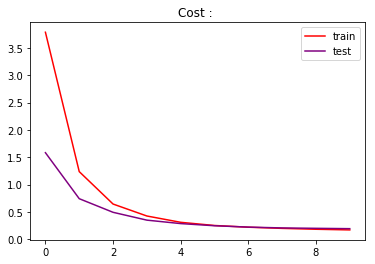

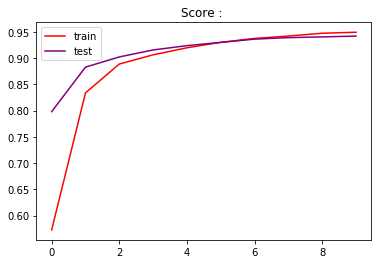

In [12]:
n = 500
model = Sequential(
    Linear( dim, n ),
    HighwayModel(n),
    HighwayModel(n),
    HighwayModel(n),

    Linear(n, 10)
)
loss = CrossEntropyLoss()
lr = 1e-2
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=10)
plot_CS(*tmp)

In [13]:
tmp[3][-1]

tensor(0.9419)


  0%|                                                  | 0/100 [00:00<?, ?it/s]C:\Users\Juliette\Dropbox\ecole_ing\DAC\AS\AS-TME1\Campagne Exp\highway.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  T = self.gate_func(self.gate(x))
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")

100%|████████████████████████████████████████| 100/100 [05:16<00:00,  3.10s/it]


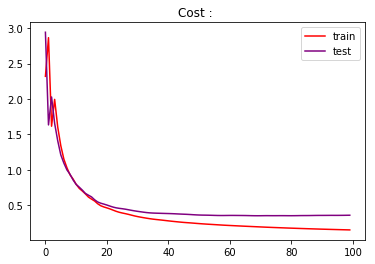

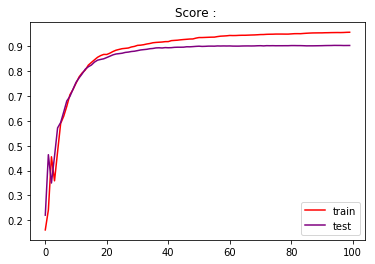

In [13]:
model = Sequential(
    Linear( dim, 10 ),
    HighwayModel(10),
    HighwayModel(10, activ_func=torch.nn.functional.sigmoid, gate_func=torch.nn.functional.relu)
)
loss = CrossEntropyLoss()
lr = 1e-2
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=100)
plot_CS(*tmp)

In [15]:
tmp[3][-5:]


[tensor(0.9036),
 tensor(0.9036),
 tensor(0.9032),
 tensor(0.9033),
 tensor(0.9034)]

In [16]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[ 0.0440,  0.0058,  0.0020,  ...,  0.0248,  0.0270,  0.0238],
        [-0.0327, -0.0261, -0.0128,  ..., -0.0346, -0.0032,  0.0268],
        [-0.0212, -0.0279, -0.0242,  ...,  0.0199, -0.0296,  0.0326],
        ...,
        [-0.0145,  0.0030,  0.0000,  ...,  0.0182, -0.0183, -0.0046],
        [ 0.0137, -0.0276,  0.0035,  ..., -0.0153, -0.0253, -0.0059],
        [-0.0005,  0.0275, -0.0064,  ...,  0.0228, -0.0200, -0.0009]],
       requires_grad=True)
Parameter containing:
tensor([-0.0179,  0.0250,  0.0268,  0.0415, -0.0131,  0.0593,  0.0377,  0.0407,
         0.0332,  0.0067], requires_grad=True)
Parameter containing:
tensor([[ 0.2121,  0.2232, -0.0307, -0.1635, -0.0817,  0.1338, -0.2730,  0.4366,
          0.1147,  0.0085],
        [ 0.0074, -0.2999, -0.1380, -0.0169, -0.2248,  0.0773, -0.0363,  0.4334,
          0.0280, -0.2980],
        [ 0.1380,  0.0980,  0.3409,  0.1454,  0.0885,  0.0829, -0.1367, -0.0064,
         -0.0816,  0.0338],
        [-0.1995,  